In [22]:
import seaborn as sns
import pandas as pd
import numpy as np


In [23]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
df.rename({'sex':'Gender'},axis=1,inplace=True)

In [26]:
df.isnull().sum()

,0
total_bill,0
tip,0
Gender,0
smoker,0
day,0
time,0
size,0


In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [28]:
df['smoker']=lb.fit_transform(df['smoker'])
df['Gender']=lb.fit_transform(df['Gender'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])

In [29]:
df.dtypes

,0
total_bill,float64
tip,float64
Gender,int64
smoker,int64
day,int64
time,int64
size,int64


In [30]:
df

,total_bill,tip,Gender,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


<Axes: >

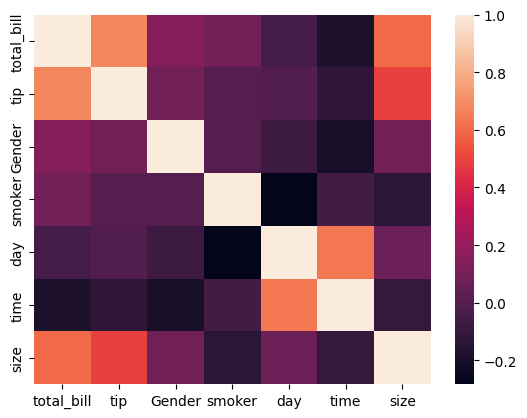

In [31]:
sns.heatmap(df.corr())

In [32]:
import matplotlib.pyplot as plt

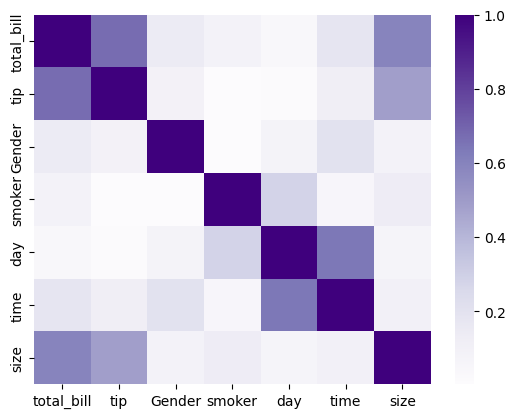

In [33]:
sns.heatmap(np.abs(df.corr()),cmap='Purples')
plt.show()

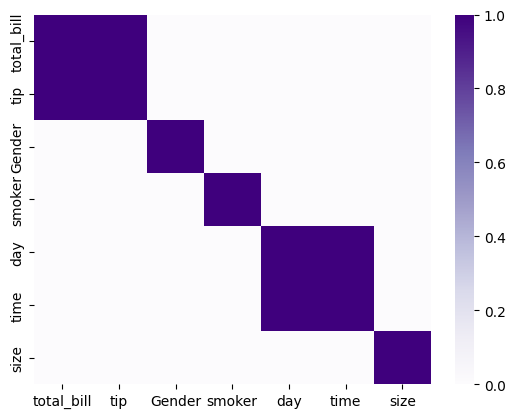

In [35]:
sns.heatmap(np.abs(df.corr())>0.6,cmap="Purples")
plt.show()

In [ ]:
Scaling techniques
 1) standadization ---> mean=0,std=1
 2) normalization ----> range of 0 to 1 inclusive

In [37]:
df.describe()

,total_bill,tip,Gender,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [39]:
sc.fit_transform(df)

array([[-3.14711305e-01, -1.43994695e+00, -1.34335316e+00, ...,
         2.79157595e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       ...,
       [ 3.24629502e-01, -7.22971264e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-2.21286504e-01, -9.04025732e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.13228903e-01,  1.24660453e-03, -1.34335316e+00, ...,
         1.36033939e+00, -6.21581561e-01, -6.00192629e-01]])

In [40]:
scale_array=sc.fit_transform(df)

In [41]:
scale_array.shape

(244, 7)

In [42]:
scale_df=pd.DataFrame(scale_array,columns=df.columns)
scale_df

,total_bill,tip,Gender,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193
